Function Transformation


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = pd.read_csv("loan1.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


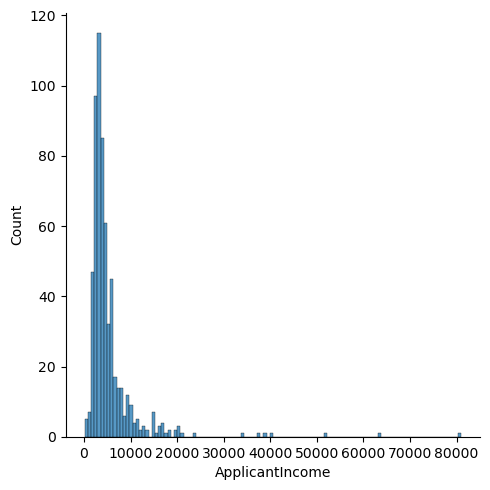

In [15]:
sns.displot(df["ApplicantIncome"])
plt.show()

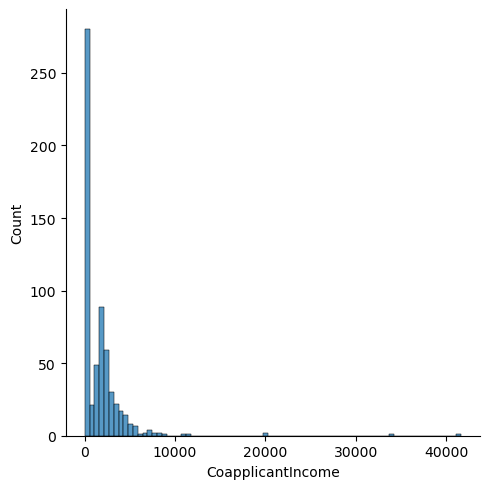

In [16]:
sns.displot(df["CoapplicantIncome"])
plt.show()

In [17]:
q1= df["ApplicantIncome"].quantile(0.25)
q3= df["ApplicantIncome"].quantile(0.75)
iqr = q3-q1

In [18]:
min_r = q1-(1.5*iqr)
max_r = q3+(1.5*iqr)
min_r, max_r

(-1498.75, 10171.25)

In [19]:
df = df[df["ApplicantIncome"]<= max_r]

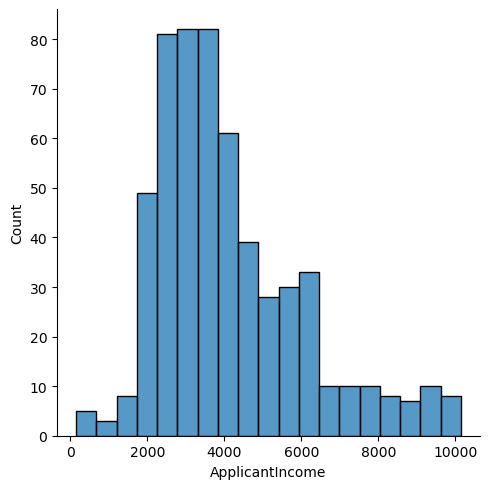

In [20]:
sns.displot(df["ApplicantIncome"])
plt.show()

In [23]:
from sklearn.preprocessing import FunctionTransformer

In [24]:
ft = FunctionTransformer(func=np.log1p)

In [25]:
ft.fit(df[["ApplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [26]:
df["ApplicantIncome_tf"] = ft.transform(df[["ApplicantIncome"]])

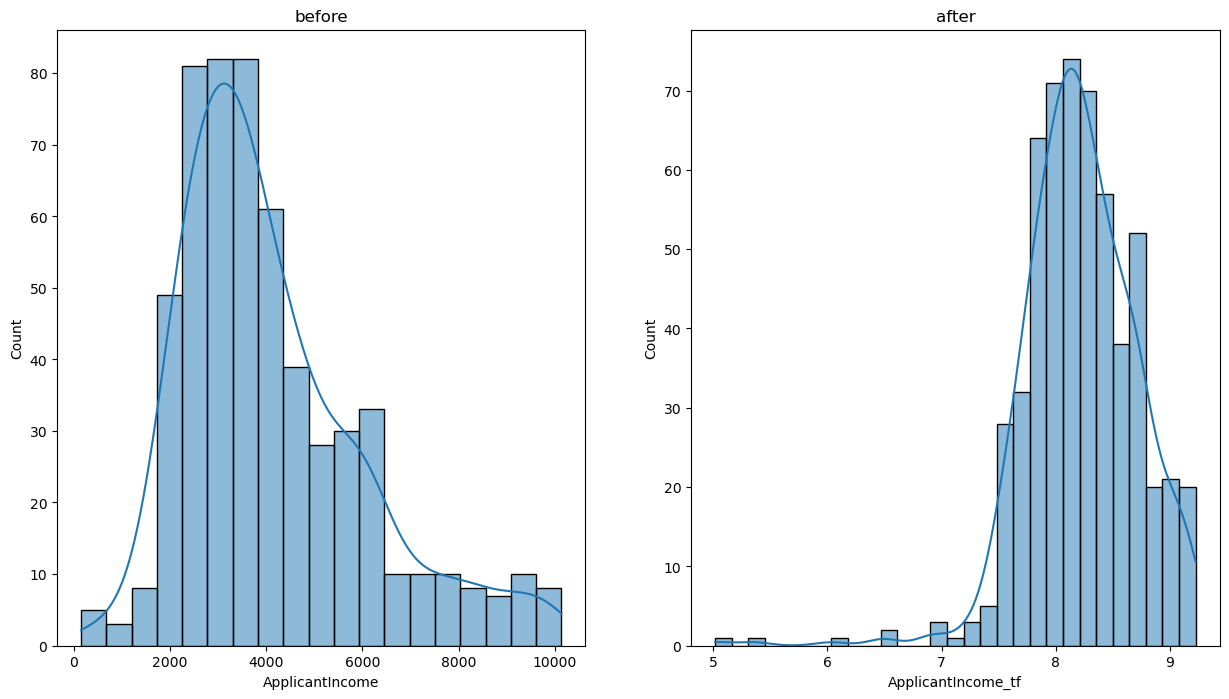

In [31]:
plt.figure(figsize=(15,8))

# Plotting the original ApplicantIncome
plt.subplot(1, 2, 1)
sns.histplot(df["ApplicantIncome"], kde=True)
plt.title("before")

# Plotting the transformed ApplicantIncome
plt.subplot(1, 2, 2)
sns.histplot(df["ApplicantIncome_tf"], kde=True)
plt.title("after")

plt.show()